<a href="https://colab.research.google.com/github/charlesdaigre/PROJECT_WHOOP/blob/Mod-CSV-CYCLES/PROJECT_WHOOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  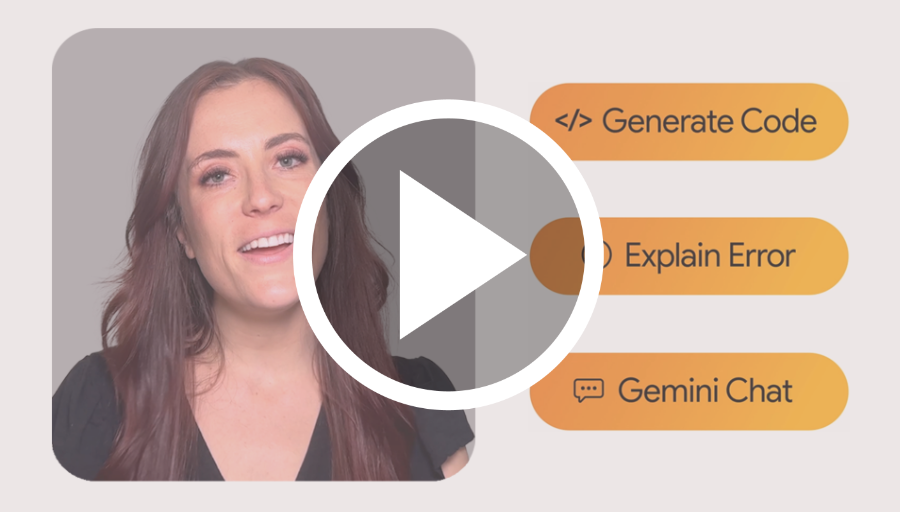
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

ModuleNotFoundError: No module named 'numpy'

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [8]:
pip3 install pandas


SyntaxError: invalid syntax (4007692362.py, line 1)

In [9]:
import pandas as pd


In [10]:
df_journal = pd.read_csv('/content/journal_entries.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/journal_entries.csv'

In [ ]:
df_journal

,Cycle start time,Cycle end time,Cycle timezone,Question text,Answered yes,Notes
0,2024-10-23 00:33:55,NaN,UTC+01:00,Have any alcoholic drinks?,False,NaN
1,2024-10-23 00:33:55,NaN,UTC+01:00,Have any caffeine?,True,NaN
2,2024-10-23 00:33:55,NaN,UTC+01:00,Avoid consuming processed foods?,True,NaN
3,2024-10-23 00:33:55,NaN,UTC+01:00,Take creatine?,True,NaN
4,2024-10-23 00:33:55,NaN,UTC+01:00,Take fish oil?,True,NaN
...,...,...,...,...,...,...
6337,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,Read (non-screened device) while in bed?,True,NaN
6338,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,Spend time stretching?,False,NaN
6339,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,Experiencing COVID-19 symptoms,False,NaN
6340,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,Receive dose #2 of COVID-19 vaccination?,False,NaN


In [ ]:
df_cycles = pd.read_csv('/content/physiological_cycles.csv')

In [ ]:
df_cycles

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %
0,2024-10-23 00:33:55,NaT,UTC+01:00,44.0,57.0,51.0,34.90,97.16,NaN,NaN,...,460.0,482.0,276.0,102.0,82.0,22.0,470.0,11.0,95.0,71.0
1,2024-10-22 01:34:30,2024-10-23 00:33:55,UTC+01:00,71.0,54.0,65.0,33.90,97.83,8.7,2104.0,...,369.0,386.0,128.0,107.0,134.0,17.0,391.0,0.0,95.0,59.0
2,2024-10-21 00:34:22,2024-10-22 01:34:30,UTC+01:00,95.0,50.0,80.0,33.90,96.17,9.2,2311.0,...,477.0,493.0,255.0,68.0,154.0,16.0,459.0,0.0,97.0,72.0
3,2024-10-20 00:40:05,2024-10-21 00:34:22,UTC+01:00,88.0,53.0,71.0,34.15,97.24,8.4,2139.0,...,486.0,641.0,238.0,107.0,141.0,155.0,458.0,0.0,76.0,66.0
4,2024-10-19 01:26:00,2024-10-20 00:40:05,UTC+01:00,88.0,52.0,66.0,34.90,98.36,8.2,2101.0,...,549.0,568.0,271.0,117.0,161.0,19.0,529.0,31.0,96.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,70.0,54.0,66.0,35.00,95.67,9.6,2176.0,...,548.0,575.0,319.0,114.0,115.0,27.0,516.0,0.0,95.0,NaN
612,2022-04-11 00:00:00,2022-04-11 23:30:03,UTC+01:00,NaN,NaN,NaN,NaN,NaN,13.7,1641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,2022-04-10 00:00:00,2022-04-11 00:00:00,UTC+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,2022-04-09 00:00:00,2022-04-10 00:00:00,UTC+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cycles.dtypes

,0
Cycle start time,object
Cycle end time,object
Cycle timezone,object
Recovery score %,float64
Resting heart rate (bpm),float64
Heart rate variability (ms),float64
Skin temp (celsius),float64
Blood oxygen %,float64
Day Strain,float64
Energy burned (cal),float64


In [ ]:
#changer type des date de object a datetime
df_cycles['Cycle start time'] = pd.to_datetime(df_cycles['Cycle start time'])
df_cycles['Cycle end time'] = pd.to_datetime(df_cycles['Cycle end time'])



In [ ]:
df_cycles.dtypes

,0
Cycle start time,datetime64[ns]
Cycle end time,datetime64[ns]
Cycle timezone,object
Recovery score %,float64
Resting heart rate (bpm),float64
Heart rate variability (ms),float64
Skin temp (celsius),float64
Blood oxygen %,float64
Day Strain,float64
Energy burned (cal),float64


In [ ]:
null_count = df_cycles.isnull().sum()

In [ ]:
print(null_count)

Cycle start time                0
Cycle end time                  1
Cycle timezone                  0
Recovery score %               60
Resting heart rate (bpm)       60
Heart rate variability (ms)    60
Skin temp (celsius)            61
Blood oxygen %                 61
Day Strain                     57
Energy burned (cal)            57
Max HR (bpm)                   57
Average HR (bpm)               57
Sleep onset                    60
Wake onset                     60
Sleep performance %            60
Respiratory rate (rpm)         61
Asleep duration (min)          60
In bed duration (min)          60
Light sleep duration (min)     60
Deep (SWS) duration (min)      60
REM duration (min)             60
Awake duration (min)           60
Sleep need (min)               60
Sleep debt (min)               60
Sleep efficiency %             60
Sleep consistency %            71
dtype: int64


In [ ]:
df_cycles.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %', 'Sleep consistency %'],
      dtype='object')

In [ ]:
#sauv changements
df_cycles.to_csv('cycles_V2.csv' , index=False)

In [ ]:
df_sleeps = pd.read_csv('/content/sleeps.csv')

In [ ]:
df_sleeps

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %,Nap
0,2024-10-23 00:33:55,NaN,UTC+01:00,2024-10-23 00:33:55,2024-10-23 08:36:02,98,14.5,460,482,276,102,82,22,470,11,95,71.0,False
1,2024-10-22 01:34:30,2024-10-23 00:33:55,UTC+01:00,2024-10-22 01:34:30,2024-10-22 08:12:58,94,14.0,369,386,128,107,134,17,391,0,95,59.0,False
2,2024-10-21 00:34:22,2024-10-22 01:34:30,UTC+01:00,2024-10-21 20:44:11,2024-10-21 21:56:17,15,15.3,69,72,38,9,22,3,461,0,100,NaN,True
3,2024-10-21 00:34:22,2024-10-22 01:34:30,UTC+01:00,2024-10-21 00:34:22,2024-10-21 08:51:22,100,14.3,477,493,255,68,154,16,459,0,97,72.0,False
4,2024-10-20 00:40:05,2024-10-21 00:34:22,UTC+01:00,2024-10-20 00:40:05,2024-10-20 11:21:17,100,14.1,486,641,238,107,141,155,458,0,76,66.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-04-15 23:20:54,2022-04-16 23:19:19,UTC+01:00,2022-04-15 23:20:54,2022-04-16 06:34:55,86,14.1,401,434,182,87,132,33,466,5,95,81.0,False
704,2022-04-14 23:32:58,2022-04-15 23:20:54,UTC+01:00,2022-04-14 23:32:58,2022-04-15 08:03:55,98,13.7,493,510,289,107,97,17,502,33,96,78.0,False
705,2022-04-13 23:56:14,2022-04-14 23:32:58,UTC+01:00,2022-04-13 23:56:14,2022-04-14 07:35:32,85,14.1,438,456,222,95,121,18,516,49,96,NaN,False
706,2022-04-12 22:54:49,2022-04-13 23:56:14,UTC+01:00,2022-04-12 22:54:49,2022-04-13 05:26:28,78,15.0,361,389,216,54,91,28,463,0,92,NaN,False


In [ ]:
df_workout = pd.read_csv('/content/workouts.csv')

In [ ]:
df_workout

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2024-10-21 00:34:22,2024-10-22 01:34:30,UTC+01:00,2024-10-21 15:25:30,2024-10-21 16:11:59,46,Walking,5.3,143.0,136.0,100.0,46.0,25.0,0.0,0.0,0.0,False,NaN,NaN,NaN
1,2024-10-20 00:40:05,2024-10-21 00:34:22,UTC+01:00,2024-10-20 20:34:30,2024-10-20 21:01:29,26,Walking,4.5,57.0,129.0,96.0,75.0,6.0,0.0,0.0,0.0,False,NaN,NaN,NaN
2,2024-10-19 01:26:00,2024-10-20 00:40:05,UTC+01:00,2024-10-19 22:30:00,2024-10-19 22:59:25,29,Activity,4.5,64.0,134.0,92.0,51.0,12.0,0.0,0.0,0.0,False,NaN,NaN,NaN
3,2024-10-19 01:26:00,2024-10-20 00:40:05,UTC+01:00,2024-10-19 21:58:30,2024-10-19 22:16:29,17,Walking,4.3,36.0,126.0,95.0,59.0,11.0,0.0,0.0,0.0,False,NaN,NaN,NaN
4,2024-10-19 01:26:00,2024-10-20 00:40:05,UTC+01:00,2024-10-19 19:57:00,2024-10-19 20:14:59,17,Walking,4.7,71.0,149.0,104.0,36.0,30.0,14.0,0.0,0.0,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2022-04-09 00:00:00,2022-04-10 00:00:00,UTC+01:00,2022-04-09 20:42:55,2022-04-09 21:00:49,17,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
931,2022-04-09 00:00:00,2022-04-10 00:00:00,UTC+01:00,2022-04-09 19:15:32,2022-04-09 20:13:38,58,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
932,2022-04-09 00:00:00,2022-04-10 00:00:00,UTC+01:00,2022-04-09 10:51:21,2022-04-09 11:21:32,30,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
933,2022-04-04 00:00:00,2022-04-05 00:00:00,UTC+01:00,2022-04-04 20:34:58,2022-04-04 21:32:54,57,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [6]:
df_cycles = pd.read_csv('data/physiological_cycles.csv')


In [7]:
df_cycles

,cycle_start_time,cycle_end_time,cycle_timezone,recovery_score_%,resting_heart_rate_bpm,heart_rate_variability_ms,skin_temp_celsius,blood_oxygen_%,day_strain,energy_burned_cal,...,asleep_duration_min,in_bed_duration_min,light_sleep_duration_min,deep_sws_duration_min,rem_duration_min,awake_duration_min,sleep_need_min,sleep_debt_min,sleep_efficiency_%,sleep_consistency_%
0,2024-10-23 00:33:55,NaN,UTC+01:00,44.0,57.0,51.0,34.90,97.16,NaN,NaN,...,460.0,482.0,276.0,102.0,82.0,22.0,470.0,11.0,95.0,71.0
1,2024-10-22 01:34:30,2024-10-23 00:33:55,UTC+01:00,71.0,54.0,65.0,33.90,97.83,8.7,2104.0,...,369.0,386.0,128.0,107.0,134.0,17.0,391.0,0.0,95.0,59.0
2,2024-10-21 00:34:22,2024-10-22 01:34:30,UTC+01:00,95.0,50.0,80.0,33.90,96.17,9.2,2311.0,...,477.0,493.0,255.0,68.0,154.0,16.0,459.0,0.0,97.0,72.0
3,2024-10-20 00:40:05,2024-10-21 00:34:22,UTC+01:00,88.0,53.0,71.0,34.15,97.24,8.4,2139.0,...,486.0,641.0,238.0,107.0,141.0,155.0,458.0,0.0,76.0,66.0
4,2024-10-19 01:26:00,2024-10-20 00:40:05,UTC+01:00,88.0,52.0,66.0,34.90,98.36,8.2,2101.0,...,549.0,568.0,271.0,117.0,161.0,19.0,529.0,31.0,96.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-04-11 23:30:03,2022-04-12 22:54:49,UTC+01:00,70.0,54.0,66.0,35.00,95.67,9.6,2176.0,...,548.0,575.0,319.0,114.0,115.0,27.0,516.0,0.0,95.0,NaN
612,2022-04-11 00:00:00,2022-04-11 23:30:03,UTC+01:00,NaN,NaN,NaN,NaN,NaN,13.7,1641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,2022-04-10 00:00:00,2022-04-11 00:00:00,UTC+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,2022-04-09 00:00:00,2022-04-10 00:00:00,UTC+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_cycles.columns


Index(['cycle_start_time', 'cycle_end_time', 'cycle_timezone',
       'recovery_score_%', 'resting_heart_rate_bpm',
       'heart_rate_variability_ms', 'skin_temp_celsius', 'blood_oxygen_%',
       'day_strain', 'energy_burned_cal', 'max_hr_bpm', 'average_hr_bpm',
       'sleep_onset', 'wake_onset', 'sleep_performance_%',
       'respiratory_rate_rpm', 'asleep_duration_min', 'in_bed_duration_min',
       'light_sleep_duration_min', 'deep_sws_duration_min', 'rem_duration_min',
       'awake_duration_min', 'sleep_need_min', 'sleep_debt_min',
       'sleep_efficiency_%', 'sleep_consistency_%'],
      dtype='object')

In [9]:
#renommer les colonnes
df_cycles.columns = df_cycles.columns.str.replace(r"[()]", "", regex=True).str.lower().str.replace(" ", "_")


In [10]:
df_cycles.columns


Index(['cycle_start_time', 'cycle_end_time', 'cycle_timezone',
       'recovery_score_%', 'resting_heart_rate_bpm',
       'heart_rate_variability_ms', 'skin_temp_celsius', 'blood_oxygen_%',
       'day_strain', 'energy_burned_cal', 'max_hr_bpm', 'average_hr_bpm',
       'sleep_onset', 'wake_onset', 'sleep_performance_%',
       'respiratory_rate_rpm', 'asleep_duration_min', 'in_bed_duration_min',
       'light_sleep_duration_min', 'deep_sws_duration_min', 'rem_duration_min',
       'awake_duration_min', 'sleep_need_min', 'sleep_debt_min',
       'sleep_efficiency_%', 'sleep_consistency_%'],
      dtype='object')

In [11]:
# Sauvegarder les changements dans un nouveau fichier CSV
df_cycles.to_csv('data/physiological_cycles.csv', index=False)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Vérifier les premières lignes du dataset
print(df_cycles.head())

      cycle_start_time       cycle_end_time cycle_timezone  recovery_score_%  \
0  2024-10-23 00:33:55                  NaN      UTC+01:00              44.0   
1  2024-10-22 01:34:30  2024-10-23 00:33:55      UTC+01:00              71.0   
2  2024-10-21 00:34:22  2024-10-22 01:34:30      UTC+01:00              95.0   
3  2024-10-20 00:40:05  2024-10-21 00:34:22      UTC+01:00              88.0   
4  2024-10-19 01:26:00  2024-10-20 00:40:05      UTC+01:00              88.0   

   resting_heart_rate_bpm  heart_rate_variability_ms  skin_temp_celsius  \
0                    57.0                       51.0              34.90   
1                    54.0                       65.0              33.90   
2                    50.0                       80.0              33.90   
3                    53.0                       71.0              34.15   
4                    52.0                       66.0              34.90   

   blood_oxygen_%  day_strain  energy_burned_cal  ...  asleep_durati

In [15]:
# Vérifier les valeurs manquantes
print(df_cycles.isnull().sum())

cycle_start_time              0
cycle_end_time                1
cycle_timezone                0
recovery_score_%             60
resting_heart_rate_bpm       60
heart_rate_variability_ms    60
skin_temp_celsius            61
blood_oxygen_%               61
day_strain                   57
energy_burned_cal            57
max_hr_bpm                   57
average_hr_bpm               57
sleep_onset                  60
wake_onset                   60
sleep_performance_%          60
respiratory_rate_rpm         61
asleep_duration_min          60
in_bed_duration_min          60
light_sleep_duration_min     60
deep_sws_duration_min        60
rem_duration_min             60
awake_duration_min           60
sleep_need_min               60
sleep_debt_min               60
sleep_efficiency_%           60
sleep_consistency_%          71
dtype: int64


In [16]:
# Supprimer les lignes contenant des valeurs manquantes
df_cycles.dropna(inplace=True)

# Vérifier si toutes les valeurs manquantes ont été supprimées
print(df_cycles.isnull().sum())

cycle_start_time             0
cycle_end_time               0
cycle_timezone               0
recovery_score_%             0
resting_heart_rate_bpm       0
heart_rate_variability_ms    0
skin_temp_celsius            0
blood_oxygen_%               0
day_strain                   0
energy_burned_cal            0
max_hr_bpm                   0
average_hr_bpm               0
sleep_onset                  0
wake_onset                   0
sleep_performance_%          0
respiratory_rate_rpm         0
asleep_duration_min          0
in_bed_duration_min          0
light_sleep_duration_min     0
deep_sws_duration_min        0
rem_duration_min             0
awake_duration_min           0
sleep_need_min               0
sleep_debt_min               0
sleep_efficiency_%           0
sleep_consistency_%          0
dtype: int64


In [17]:
# Convertir les colonnes de temps (exemple pour 'cycle_start_time')
df_cycles['cycle_start_time'] = pd.to_datetime(df_cycles['cycle_start_time'])

# Créer des caractéristiques temporelles utiles (jour de la semaine, mois, etc.)
df_cycles['day_of_week'] = df_cycles['cycle_start_time'].dt.dayofweek
df_cycles['month'] = df_cycles['cycle_start_time'].dt.month

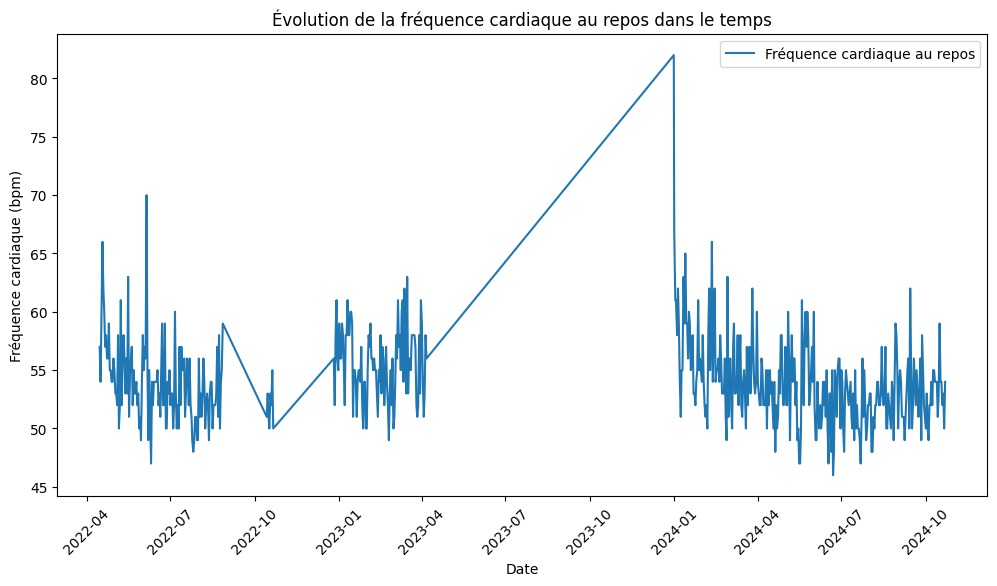

In [18]:
# Visualiser la fréquence cardiaque au repos au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(df_cycles['cycle_start_time'], df_cycles['resting_heart_rate_bpm'], label='Fréquence cardiaque au repos')
plt.title('Évolution de la fréquence cardiaque au repos dans le temps')
plt.xlabel('Date')
plt.ylabel('Fréquence cardiaque (bpm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
# Filtrer les données pour ne garder que celles de l'année 2024
df_cycles_2024 = df_cycles[df_cycles['cycle_start_time'].dt.year == 2024]

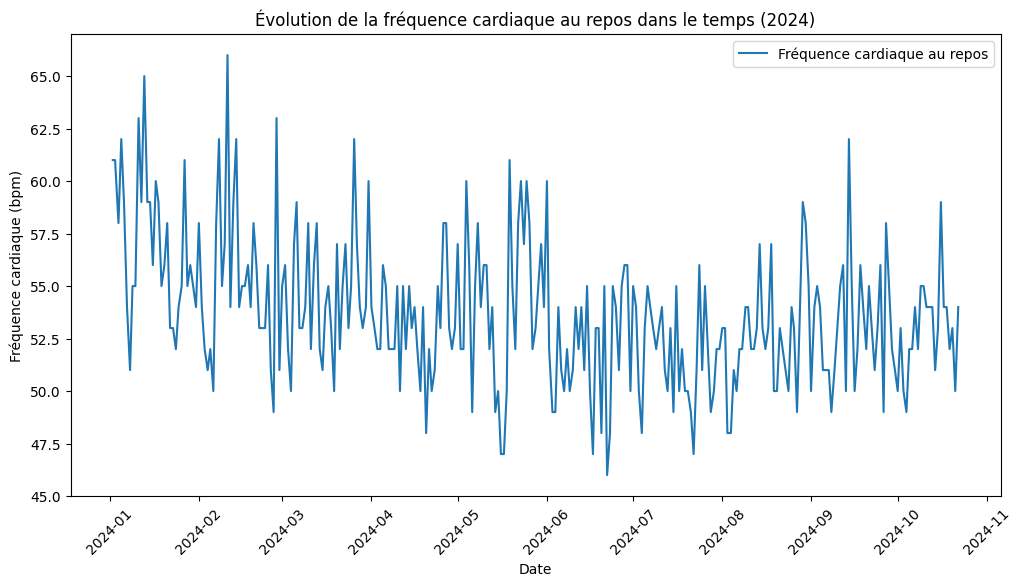

In [20]:
# Assurer que 'cycle_start_time' est bien en format datetime
df_cycles['cycle_start_time'] = pd.to_datetime(df_cycles['cycle_start_time'])

# Filtrer les données pour ne garder que celles de l'année 2024
df_cycles_2024 = df_cycles[df_cycles['cycle_start_time'].dt.year == 2024]

# Visualiser la fréquence cardiaque au repos au fil du temps (pour 2024)
plt.figure(figsize=(12, 6))
plt.plot(df_cycles_2024['cycle_start_time'], df_cycles_2024['resting_heart_rate_bpm'], label='Fréquence cardiaque au repos')
plt.title('Évolution de la fréquence cardiaque au repos dans le temps (2024)')
plt.xlabel('Date')
plt.ylabel('Fréquence cardiaque (bpm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

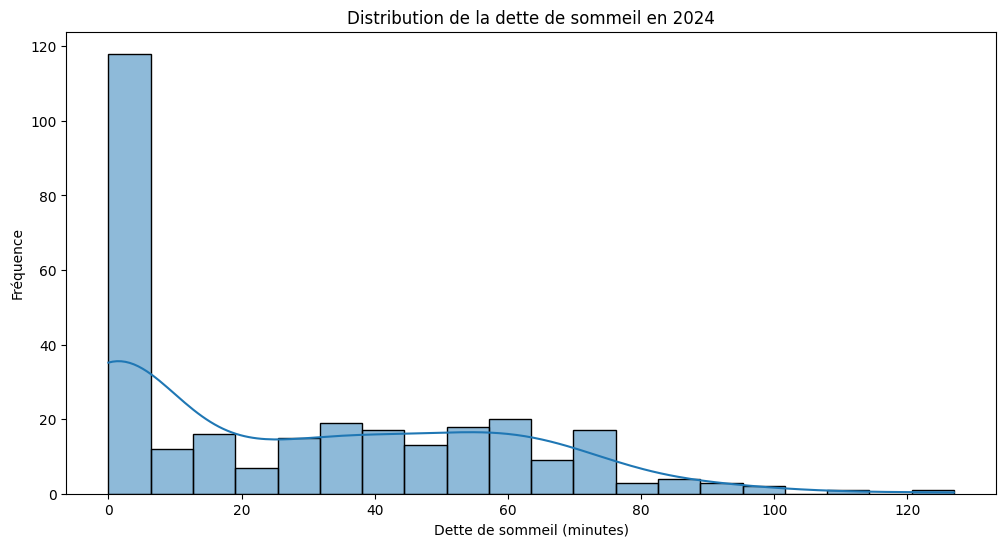

In [21]:

# Visualiser la distribution de la dette de sommeil en 2024
plt.figure(figsize=(12, 6))
sns.histplot(df_cycles_2024['sleep_debt_min'], kde=True, bins=20)
plt.title('Distribution de la dette de sommeil en 2024')
plt.xlabel('Dette de sommeil (minutes)')
plt.ylabel('Fréquence')
plt.show()

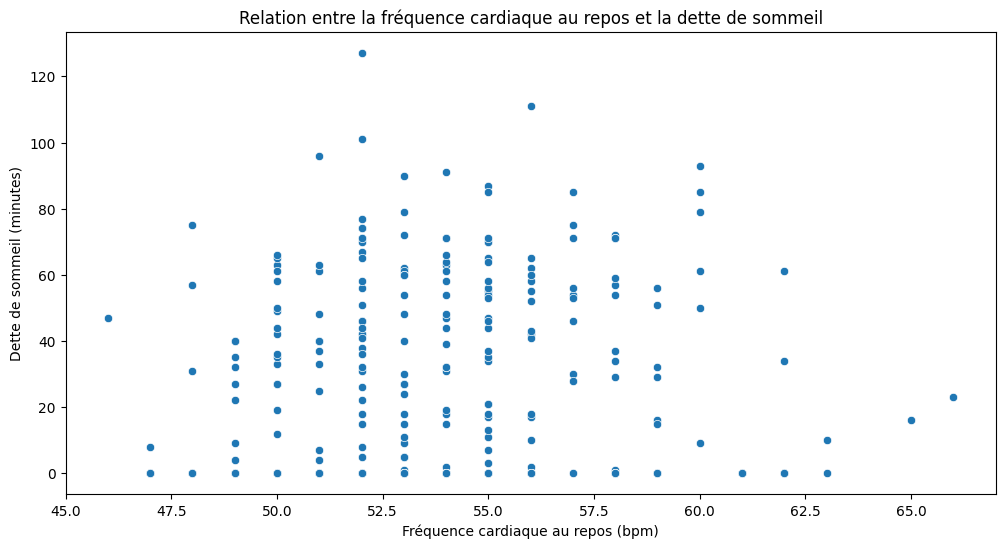

In [22]:
# Visualiser la relation entre la fréquence cardiaque au repos et la dette de sommeil
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cycles_2024['resting_heart_rate_bpm'], y=df_cycles_2024['sleep_debt_min'])
plt.title('Relation entre la fréquence cardiaque au repos et la dette de sommeil')
plt.xlabel('Fréquence cardiaque au repos (bpm)')
plt.ylabel('Dette de sommeil (minutes)')
plt.show()

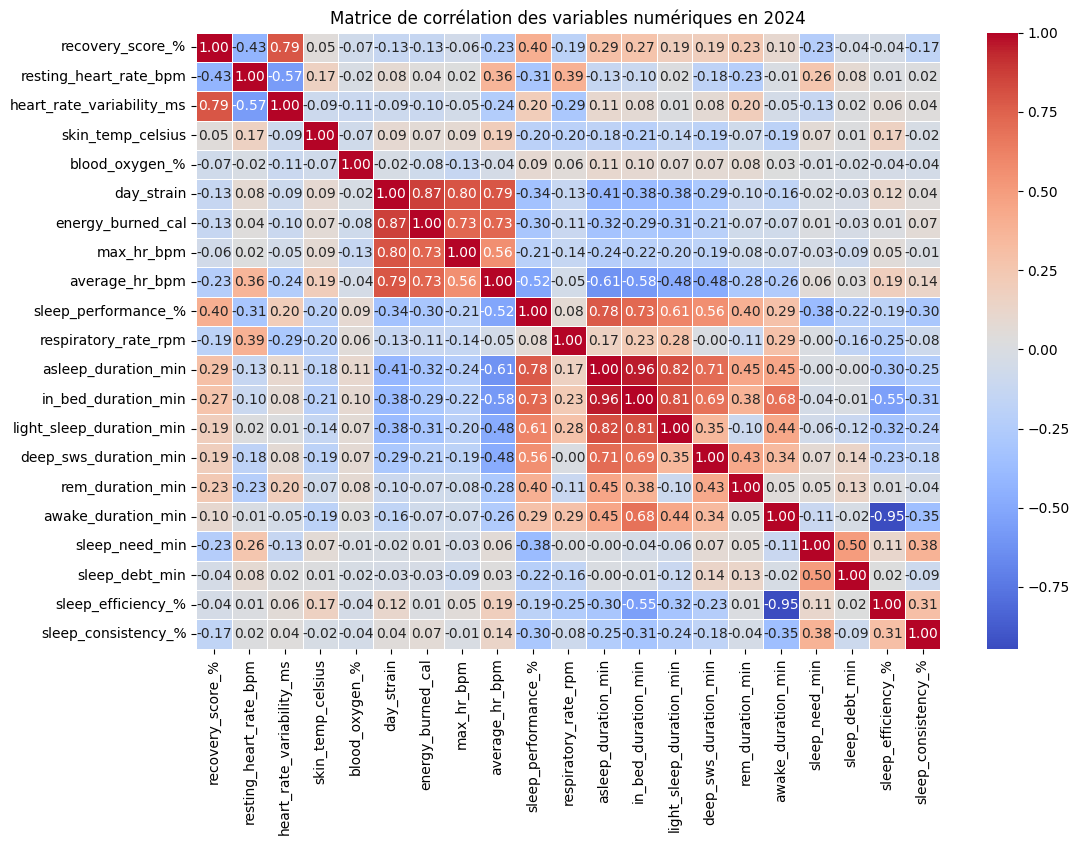

In [23]:
# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
numerical_cols = df_cycles_2024.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_cols.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques en 2024')
plt.show()

In [24]:
# Sélectionner les colonnes pertinentes pour la comparaison
df_comparison = df_cycles_2024[['recovery_score_%', 'resting_heart_rate_bpm', 'heart_rate_variability_ms']]

# Calculer les statistiques descriptives
comparison_stats = df_comparison.describe()

# Afficher le tableau des statistiques
print(comparison_stats)


       recovery_score_%  resting_heart_rate_bpm  heart_rate_variability_ms
count        295.000000              295.000000                 295.000000
mean          68.555932               53.728814                  64.213559
std           17.736816                3.405830                   8.381537
min           11.000000               46.000000                  39.000000
25%           55.000000               52.000000                  59.000000
50%           70.000000               53.000000                  64.000000
75%           83.000000               55.000000                  69.000000
max           99.000000               66.000000                  89.000000


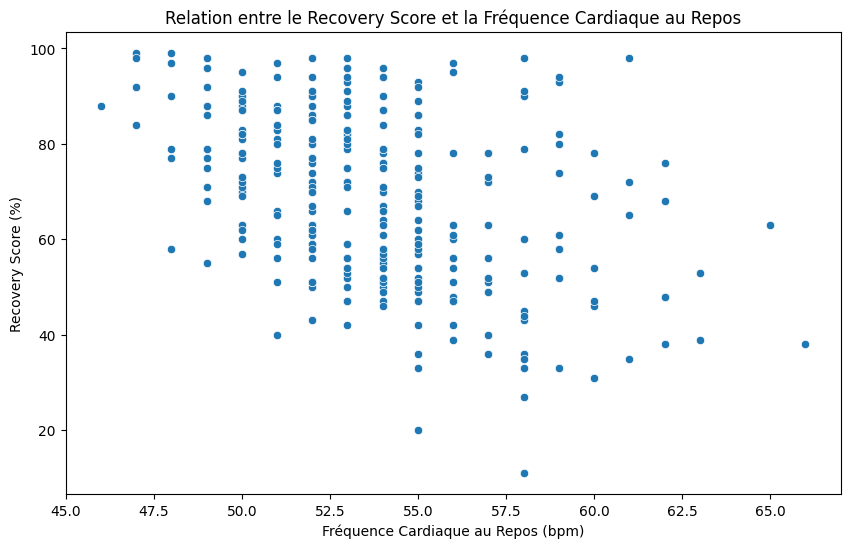

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cycles_2024['resting_heart_rate_bpm'], y=df_cycles_2024['recovery_score_%'])
plt.title('Relation entre le Recovery Score et la Fréquence Cardiaque au Repos')
plt.xlabel('Fréquence Cardiaque au Repos (bpm)')
plt.ylabel('Recovery Score (%)')
plt.show()


C:\Users\Charles\AppData\Local\Temp\ipykernel_20508\3090913612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)


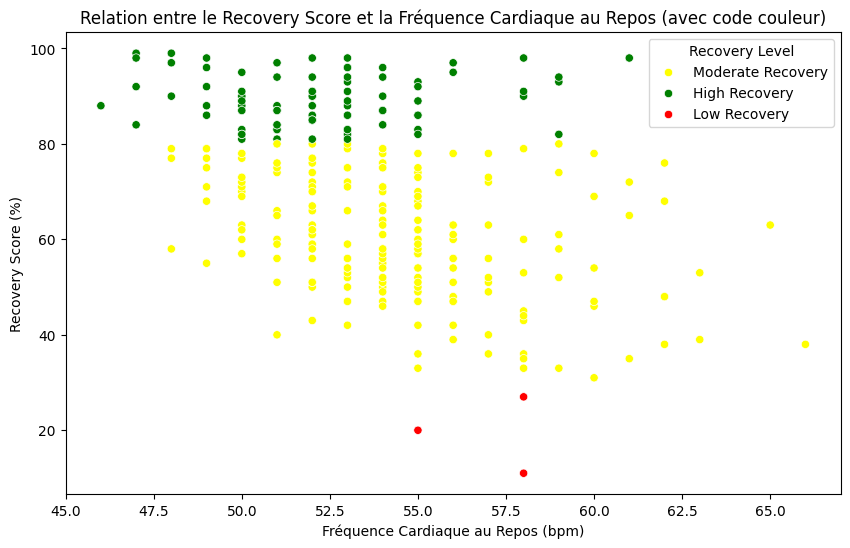

In [29]:
# Ajouter une colonne pour catégoriser le Recovery Score
def categorize_recovery(score):
    if score > 80:
        return 'High Recovery'
    elif score < 30:
        return 'Low Recovery'
    else:
        return 'Moderate Recovery'

df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)

# Définir une palette de couleurs pour les catégories
color_palette = {'High Recovery': 'green', 'Moderate Recovery': 'yellow', 'Low Recovery': 'red'}

# Créer le scatter plot avec un code couleur
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cycles_2024['resting_heart_rate_bpm'],
    y=df_cycles_2024['recovery_score_%'],
    hue=df_cycles_2024['Recovery_Category'],
    palette=color_palette
)
plt.title('Relation entre le Recovery Score et la Fréquence Cardiaque au Repos (avec code couleur)')
plt.xlabel('Fréquence Cardiaque au Repos (bpm)')
plt.ylabel('Recovery Score (%)')
plt.legend(title='Recovery Level')
plt.show()


C:\Users\Charles\AppData\Local\Temp\ipykernel_20508\1385842468.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)


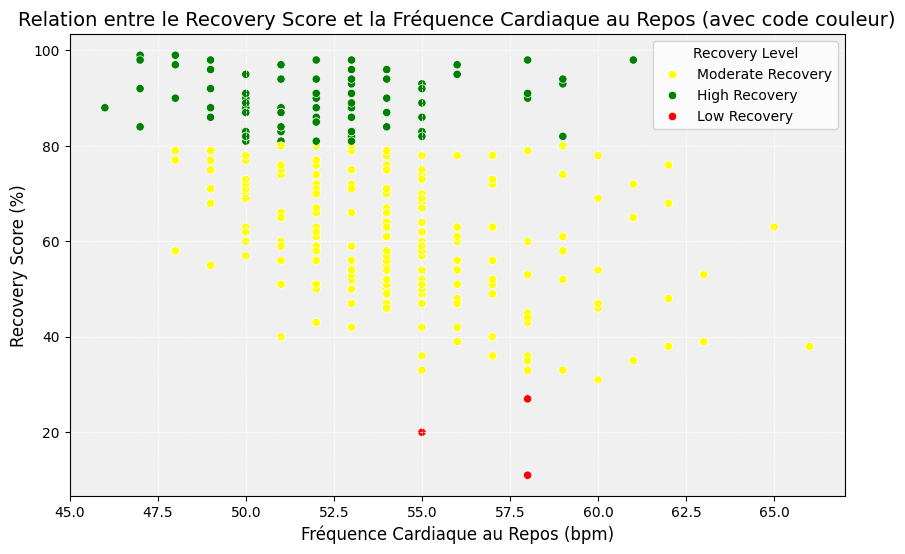

In [30]:
# Ajouter une colonne pour catégoriser le Recovery Score
def categorize_recovery(score):
    if score > 80:
        return 'High Recovery'
    elif score < 30:
        return 'Low Recovery'
    else:
        return 'Moderate Recovery'

df_cycles_2024['Recovery_Category'] = df_cycles_2024['recovery_score_%'].apply(categorize_recovery)

# Définir une palette de couleurs pour les catégories
color_palette = {'High Recovery': 'green', 'Moderate Recovery': 'yellow', 'Low Recovery': 'red'}

# Créer le scatter plot avec un fond gris clair
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#f0f0f0')  # Appliquer un fond gris clair (#f0f0f0)
sns.scatterplot(
    x=df_cycles_2024['resting_heart_rate_bpm'],
    y=df_cycles_2024['recovery_score_%'],
    hue=df_cycles_2024['Recovery_Category'],
    palette=color_palette
)
plt.title('Relation entre le Recovery Score et la Fréquence Cardiaque au Repos (avec code couleur)', fontsize=14)
plt.xlabel('Fréquence Cardiaque au Repos (bpm)', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.legend(title='Recovery Level', loc='upper right')
plt.grid(color='white', linestyle='--', linewidth=0.5)  # Ajouter une grille blanche pour plus de lisibilité
plt.show()


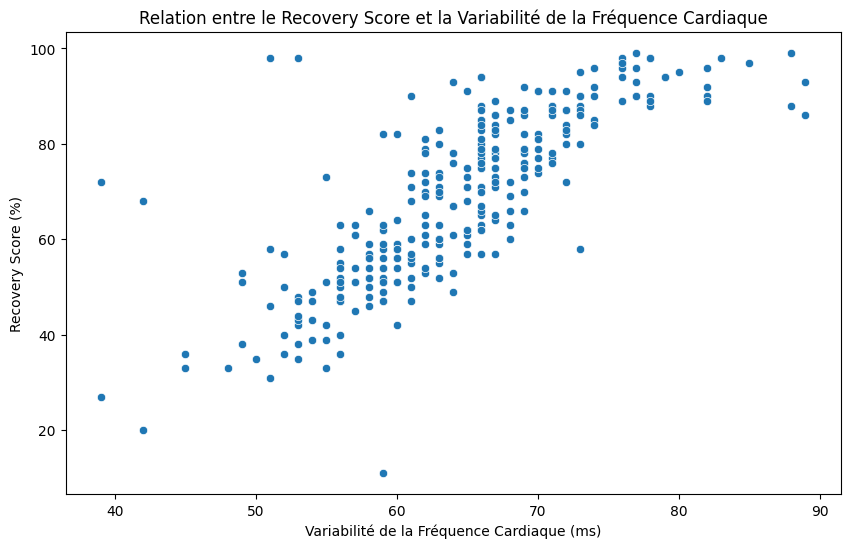

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cycles_2024['heart_rate_variability_ms'], y=df_cycles_2024['recovery_score_%'])
plt.title('Relation entre le Recovery Score et la Variabilité de la Fréquence Cardiaque')
plt.xlabel('Variabilité de la Fréquence Cardiaque (ms)')
plt.ylabel('Recovery Score (%)')
plt.show()


In [27]:
# Calcul des statistiques descriptives pour chaque relation
recovery_vs_resting_hr = df_cycles_2024[['recovery_score_%', 'resting_heart_rate_bpm']].describe()
recovery_vs_hrv = df_cycles_2024[['recovery_score_%', 'heart_rate_variability_ms']].describe()

# Renommer les colonnes pour indiquer les relations
recovery_vs_resting_hr.columns = ['Recovery Score', 'Resting Heart Rate']
recovery_vs_hrv.columns = ['Recovery Score', 'Heart Rate Variability']

# Combiner les deux tableaux en un seul
combined_table = pd.concat([recovery_vs_resting_hr, recovery_vs_hrv['Heart Rate Variability']], axis=1)

# Afficher le tableau combiné
print(combined_table)


       Recovery Score  Resting Heart Rate  Heart Rate Variability
count      295.000000          295.000000              295.000000
mean        68.555932           53.728814               64.213559
std         17.736816            3.405830                8.381537
min         11.000000           46.000000               39.000000
25%         55.000000           52.000000               59.000000
50%         70.000000           53.000000               64.000000
75%         83.000000           55.000000               69.000000
max         99.000000           66.000000               89.000000


C:\Users\Charles\AppData\Local\Temp\ipykernel_20508\2119727484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cycles_2024['recovery_next_day'] = df_cycles_2024['recovery_score_%'].shift(-1)


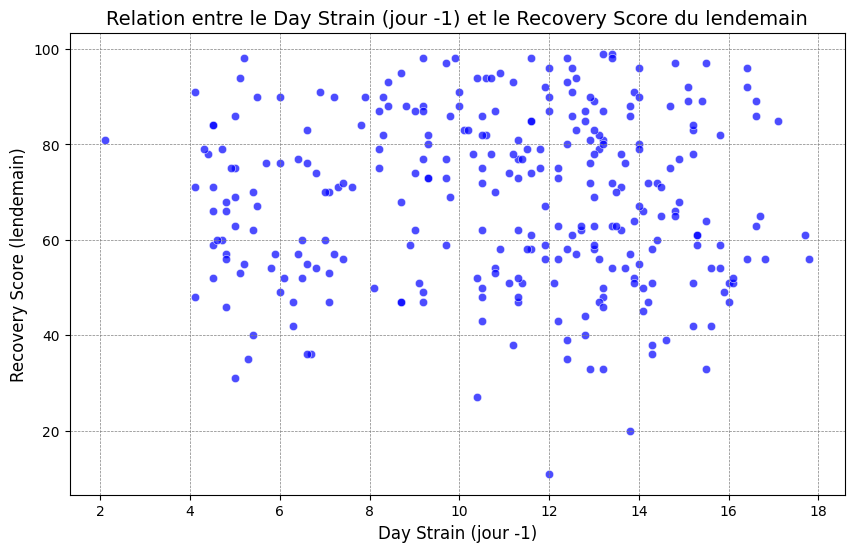

In [31]:
# Décaler le Recovery Score pour qu'il corresponde au lendemain
df_cycles_2024['recovery_next_day'] = df_cycles_2024['recovery_score_%'].shift(-1)

# Créer un scatter plot pour visualiser la relation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cycles_2024['day_strain'], 
    y=df_cycles_2024['recovery_next_day'], 
    color='blue', alpha=0.7
)
plt.title('Relation entre le Day Strain (jour -1) et le Recovery Score du lendemain', fontsize=14)
plt.xlabel('Day Strain (jour -1)', fontsize=12)
plt.ylabel('Recovery Score (lendemain)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


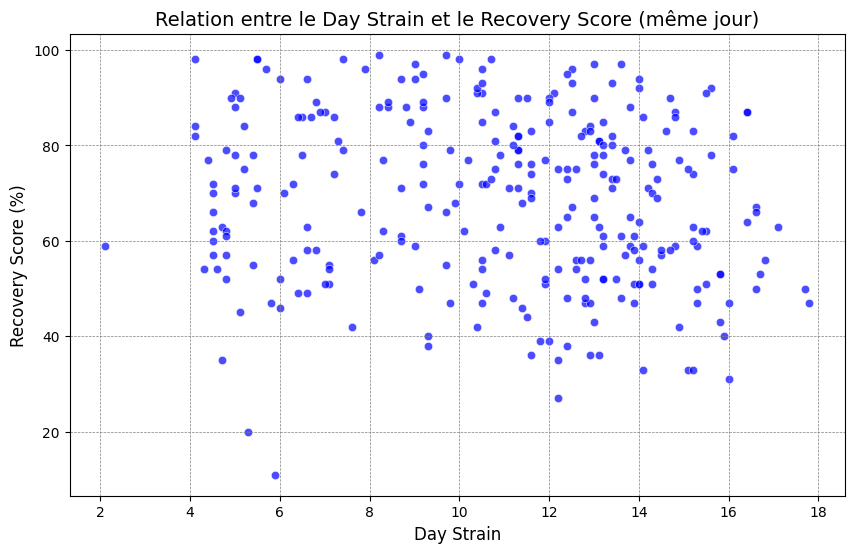

In [33]:
# Créer un scatter plot pour visualiser la relation directe
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cycles_2024['day_strain'], 
    y=df_cycles_2024['recovery_score_%'], 
    color='blue', alpha=0.7
)
plt.title('Relation entre le Day Strain et le Recovery Score (même jour)', fontsize=14)
plt.xlabel('Day Strain', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


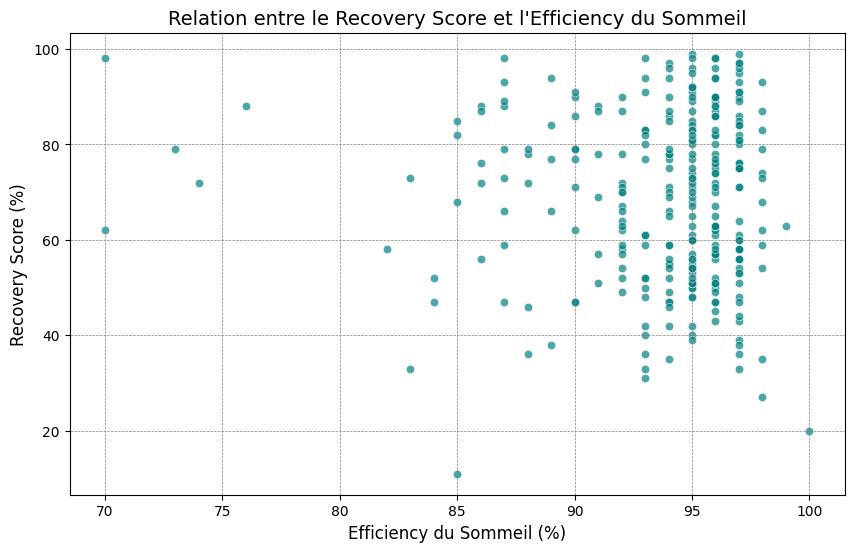

In [34]:
# Créer un scatter plot pour visualiser la relation entre Recovery Score et Sleep Efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cycles_2024['sleep_efficiency_%'], 
    y=df_cycles_2024['recovery_score_%'], 
    color='teal', alpha=0.7
)
plt.title('Relation entre le Recovery Score et l\'Efficiency du Sommeil', fontsize=14)
plt.xlabel('Efficiency du Sommeil (%)', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


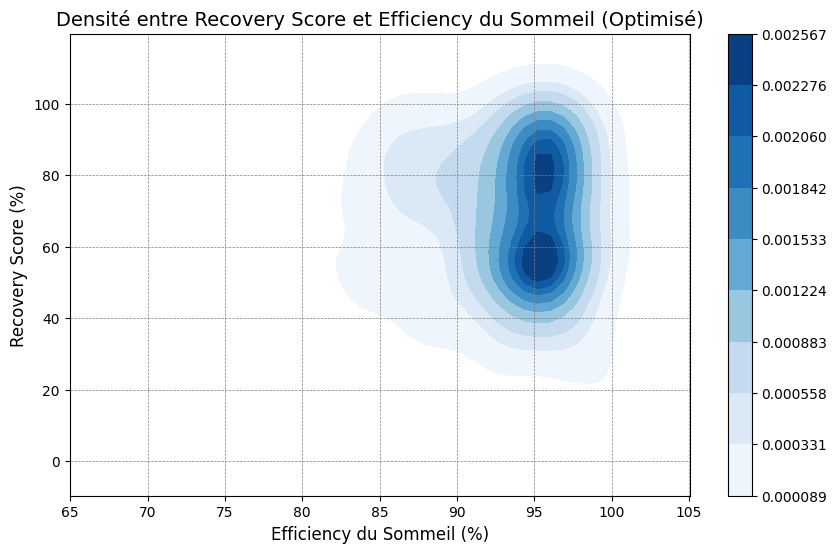

In [36]:
# Échantillonner les données pour alléger les calculs (par exemple, 1000 points)
sampled_data = df_cycles_2024.sample(n=1000, random_state=42) if len(df_cycles_2024) > 1000 else df_cycles_2024

# Créer un graphique de densité bidimensionnelle
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=sampled_data['sleep_efficiency_%'],
    y=sampled_data['recovery_score_%'],
    cmap='Blues',  # Palette de couleurs
    fill=True,     # Remplir la zone de densité
    cbar=True,     # Ajouter une barre de couleur
    levels=10,     # Réduire les niveaux de densité
    gridsize=50    # Réduire la résolution de la grille
)
plt.title('Densité entre Recovery Score et Efficiency du Sommeil (Optimisé)', fontsize=14)
plt.xlabel('Efficiency du Sommeil (%)', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


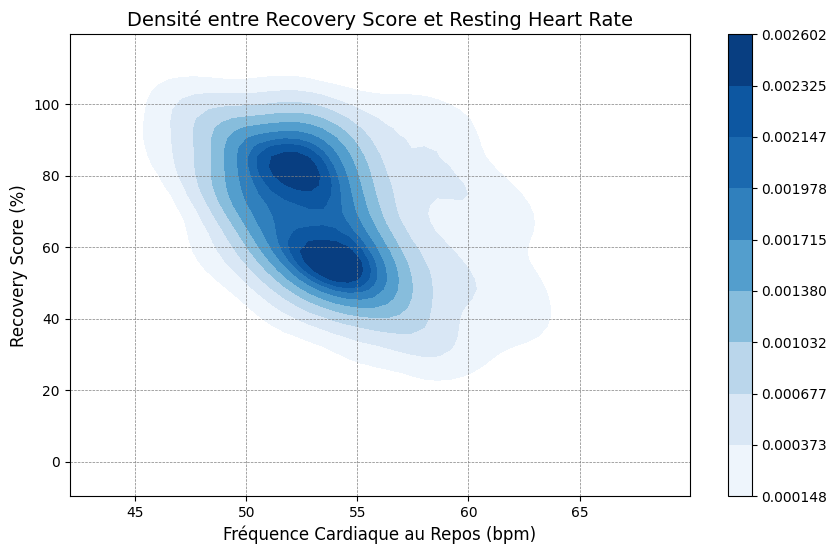

In [37]:
# Échantillonner les données pour alléger les calculs (par exemple, 1000 points)
sampled_data = df_cycles_2024.sample(n=1000, random_state=42) if len(df_cycles_2024) > 1000 else df_cycles_2024

# Créer un graphique de densité bidimensionnelle pour Recovery Score vs Resting Heart Rate
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=sampled_data['resting_heart_rate_bpm'],
    y=sampled_data['recovery_score_%'],
    cmap='Blues',  # Palette de couleurs
    fill=True,     # Remplir la zone de densité
    cbar=True,     # Ajouter une barre de couleur
    levels=10,     # Réduire les niveaux de densité
    gridsize=50    # Réduire la résolution de la grille
)
plt.title('Densité entre Recovery Score et Resting Heart Rate', fontsize=14)
plt.xlabel('Fréquence Cardiaque au Repos (bpm)', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


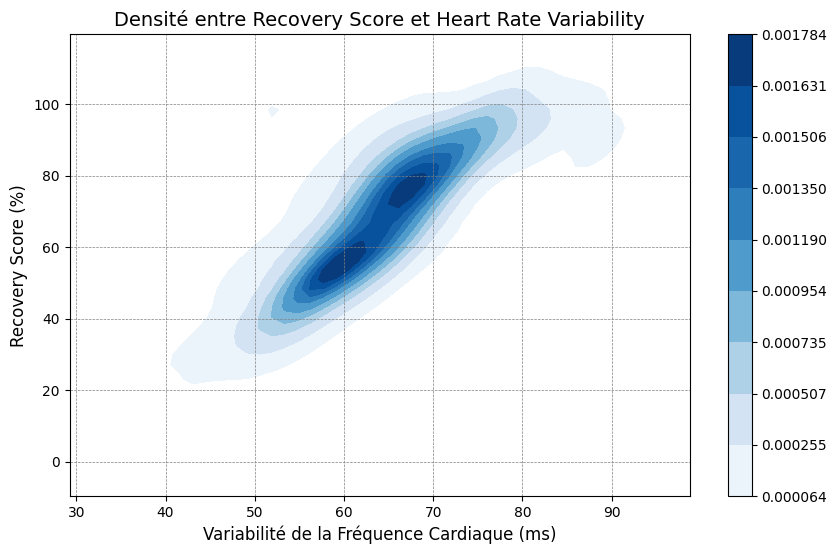

In [38]:
# Créer un graphique de densité bidimensionnelle pour Recovery Score vs Heart Rate Variability
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=sampled_data['heart_rate_variability_ms'],
    y=sampled_data['recovery_score_%'],
    cmap='Blues',  # Palette de couleurs
    fill=True,     # Remplir la zone de densité
    cbar=True,     # Ajouter une barre de couleur
    levels=10,     # Réduire les niveaux de densité
    gridsize=50    # Réduire la résolution de la grille
)
plt.title('Densité entre Recovery Score et Heart Rate Variability', fontsize=14)
plt.xlabel('Variabilité de la Fréquence Cardiaque (ms)', fontsize=12)
plt.ylabel('Recovery Score (%)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [39]:
#Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [40]:
#Préparer les données
# Sélectionner les variables Resting Heart Rate et Heart Rate Variability
X = df_cycles_2024[['resting_heart_rate_bpm', 'heart_rate_variability_ms']]  # Variables explicatives
y = df_cycles_2024['recovery_score_%']  # Variable à prédire


In [41]:
#Diviser les données en ensembles d'entraînement et de test
# Diviser les données en 80% pour l'entraînement et 20% pour les tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
#Créer et entraîner le modèle de régression linéaire
# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)


LinearRegression()

In [43]:
#Prédire les valeurs sur l'ensemble de test
# Prédire les valeurs de Recovery Score sur l'ensemble de test
y_pred = model.predict(X_test)


In [44]:
#Évaluer la performance du modèle
# Calculer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error (MSE): 117.19
R-squared: 0.64


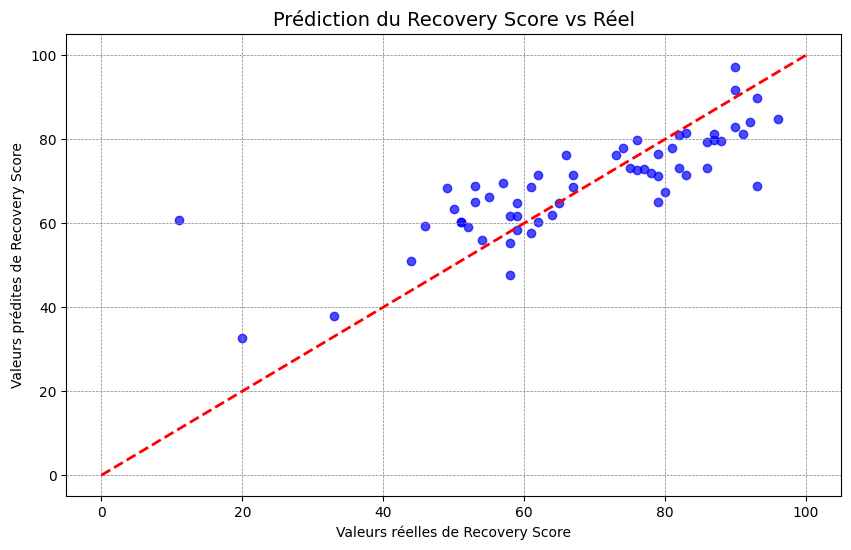

In [45]:
#Visualiser la régression
# Tracer les valeurs réelles vs les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--', linewidth=2)  # Ligne de la parfaite prédiction
plt.title('Prédiction du Recovery Score vs Réel', fontsize=14)
plt.xlabel('Valeurs réelles de Recovery Score')
plt.ylabel('Valeurs prédites de Recovery Score')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()
